In [18]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [78]:
# Extracting zipped dataset
import zipfile
with zipfile.ZipFile('dataset/creditcard.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset/')

In [79]:
# Load the dataset
data = pd.read_csv('dataset/creditcard.csv')

## Data Overview

In [2]:
pd.options.display.max_columns = None
# pd.options.display.max_rows = None

print(f"Data Shape: {data.shape}")
data.head(2)

Data Shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [3]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Preprocessing

In [4]:
#checking null value
has_null = data.isnull().values.any()

if has_null:
    print('Data has null values. See count:')
    print(data.isnull().sum())  #to get the total count of null values per column
else:
    print('Data has no null values.')

#checking duplicate values
has_duplicates = data.duplicated().any()
if has_duplicates:
    print('Has duplicates.')
    data = data.drop_duplicates()
    print(f"Duplicates removed. New data shape: {data.shape}")
else:
    print('No duplicates found.')

# drop time column
data = data.drop(['Time'], axis = 1)

Data has no null values.
Has duplicates.
Duplicates removed. New data shape: (283726, 31)


In [5]:
# Feature scaling
scaler =  StandardScaler()
data['Amount'] = scaler.fit_transform(pd.DataFrame(data['Amount'])) 

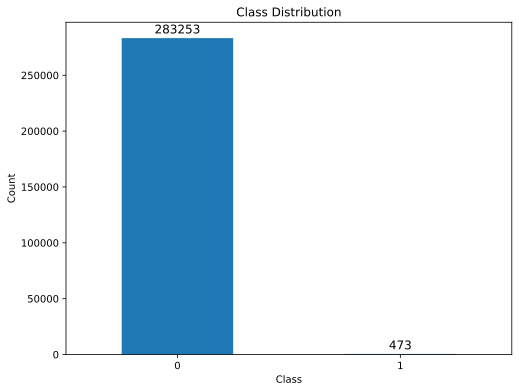

In [6]:
#check data distribution
class_counts = data['Class'].value_counts()

# Plot the value counts using a bar plot
plt.figure(figsize=(8, 6))
bars = class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Annotate bars with counts
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'), 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='center', 
                  size=12, xytext=(0, 8), 
                  textcoords='offset points')

plt.show()

In [7]:
# Split data into features and target
X = data.drop('Class', axis = 1)
y = data['Class']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Balancing class imbalance using SMOTE

In [14]:
X_resampled, y_resampled = SMOTE(random_state=4671).fit_resample(X,y)
y_resampled.value_counts()

Class
0    283253
1    283253
Name: count, dtype: int64

In [15]:
#Split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 42)

## Model Selection and training

--------- Random_Forest ----------
Accuaracy: 0.9999205662742052
Precision: 0.9998416830847171
Recall: 1.0
F1 Score: 0.9999208352758011

# Detailed Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56463
           1       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302




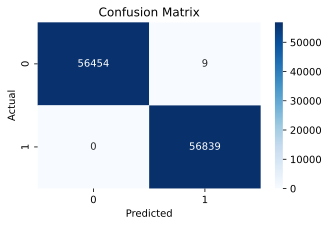




--------- Gradient Boosting ----------
Accuaracy: 0.9771583908492348
Precision: 0.9863030889761379
Recall: 0.9679093580112247
F1 Score: 0.9770196593794953

# Detailed Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56463
           1       0.99      0.97      0.98     56839

    accuracy                           0.98    113302
   macro avg       0.98      0.98      0.98    113302
weighted avg       0.98      0.98      0.98    113302




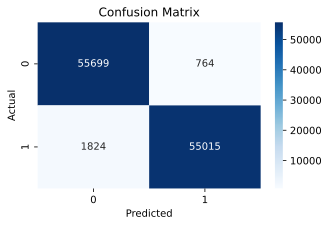

In [20]:
# Model initialization
classifier = {
    # "Decision_Tree": DecisionTreeClassifier(random_state=42), #just to check how much improvement with random forest
    'Random_Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

for model_name, clf in classifier.items():

    #performance metrics
    print(f"--------- {model_name} ----------")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate the metrics
    print(f"Accuaracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}", end='\n\n')

    # detailed classification report
    print('# Detailed Classification Report')
    print(classification_report(y_test, y_pred),  end='\n\n')

    #confusion matrix
    plt.figure(1, figsize=(5, 3))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f'Confusion_Matrix_{model_name}')
    plt.show()
    
    print('', end='\n\n\n')

## Picking and saving the best model

In [21]:
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [22]:
import joblib

# Save the trained model as pickle file
joblib.dump(best_model, "model/credit_card_model_rf.pkl")

['model/credit_card_model_rf.pkl']

## Now let's test the model with new synthetic data

In [23]:
# Load the model
loaded_model  = joblib.load("model/credit_card_model_rf.pkl")

In [76]:
def generate_sample_data():
    # Generate random data within a similar range
    sample = np.random.uniform(low=-2, high=2, size=(1, 29))  # Generate 29 features    
    return sample

# Defining feature names
feature_names = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

# Generate 5 synthetic samples
for i in range(5):
    sample_data = generate_sample_data()
    sample_df = pd.DataFrame(sample_data, columns=feature_names)
    sample_predictions = loaded_model.predict(sample_df)
    
    if sample_predictions[0] == 0:
        print(f"Sample {i+1} - Normal Transcation")
    else:
        print(f"Sample {i+1} - Fraud Transcation")

Sample 1 - Normal Transcation
Sample 2 - Normal Transcation
Sample 3 - Normal Transcation
Sample 4 - Normal Transcation
Sample 5 - Normal Transcation
